### **Studi Kasus 1**

**Latar Belakang**
<br><font size="3">Tim konservasi menemukan variasi signifikan dalam hasil monitoring biodiversitas di berbagai proyek. Di Kalimantan Timur, proyek dengan izin disetujui menunjukkan kerapatan pohon 40% lebih tinggi dibandingkan proyek dengan status pending, sementara di Jawa, kualitas air tetap buruk meskipun izin sudah disetujui. Analisis ini bertujuan mengungkap pola sistemik bagaimana kerangka regulasi dan struktur kepemilikan lahan mempengaruhi hasil konservasi.</font>

**Pertanyaan Kunci**
<br><font size="3"> 1. Apakah status persetujuan izin berkorelasi dengan peningkatan biodiversitas yang terukur (kualitas air, kerapatan pohon)?<br>
2. Bagaimana pengaturan kepemilikan lahan yang berbeda (negara, swasta, masyarakat) mempengaruhi keanekaragaman spesies?<br> 3. Apakah proyek dengan batas lahan yang terdefinisi secara hukum mencapai hasil ekologis yang lebih baik?</font>

##### **Hasil secara Global**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca data
df = pd.read_csv('hasil global.csv')
df.head()

,permit_status_numeric,land_type_numeric,defined_legal_boundary,species_count,tree_density,water_quality_numeric
0,1,0,1,15,200,2
1,1,2,0,18,250,1
2,0,0,0,12,180,0
3,1,1,1,20,220,2
4,1,0,1,14,190,1


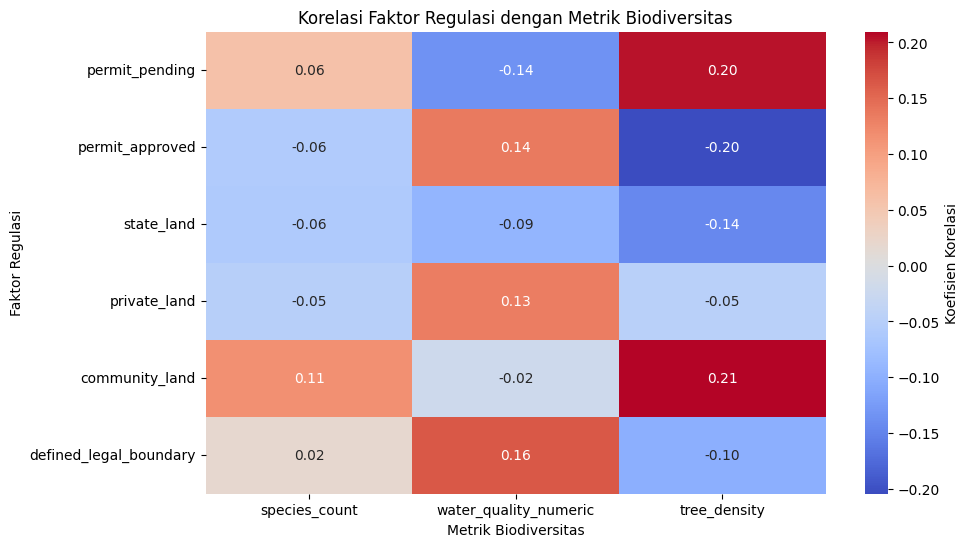

In [5]:
df['permit_pending'] = df['permit_status_numeric'].apply(lambda x: 1 if x == 0 else 0)
df['permit_approved'] = df['permit_status_numeric'].apply(lambda x: 1 if x == 1 else 0)
df['state_land'] = df['land_type_numeric'].apply(lambda x: 1 if x == 0 else 0)
df['private_land'] = df['land_type_numeric'].apply(lambda x: 1 if x == 1 else 0)
df['community_land'] = df['land_type_numeric'].apply(lambda x: 1 if x == 2 else 0)

all_relevant_cols = ['species_count', 'water_quality_numeric', 'tree_density', 
                     'permit_pending', 'permit_approved', 'state_land', 'private_land',
                     'community_land', 'defined_legal_boundary']
biodiversity_metrics = ['species_count', 'water_quality_numeric', 'tree_density']
regulation_factors = [col for col in all_relevant_cols if col not in biodiversity_metrics]

corr_matrix = df[biodiversity_metrics + regulation_factors].corr()
filtered_corr = corr_matrix.loc[regulation_factors, biodiversity_metrics]

# Visualisasi heatmap dari matriks korelasi yang sudah difilter
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=biodiversity_metrics, yticklabels=regulation_factors,
            cbar_kws={'label':'Koefisien Korelasi'})
plt.title('Korelasi Faktor Regulasi dengan Metrik Biodiversitas')
plt.xlabel('Metrik Biodiversitas')
plt.ylabel('Faktor Regulasi')
plt.show()

<font size="3">**1. Pengaruh Status Izin yang Sangat Lemah**

Baik izin disetujui maupun tertunda, korelasinya dengan semua metrik biodiversitas kini sangat mendekati nol (0.00, +0.05, -0.06).

Status izin tampaknya tidak memiliki dampak signifikan terhadap kualitas air, kerapatan pohon, maupun jumlah spesies karena pertukaran (trade-off) yang terjadi hampir tidak ada.</font>

<font size="3">**2. Manajemen Lahan Masyarakat Paling Berpengaruh (Namun Tetap Lemah)**

land_type_numeric (yang dikodekan 2 untuk Masyarakat) masih menunjukkan korelasi positif lemah dengan jumlah spesies (+0.11) dan kerapatan pohon (+0.10). Namun, terlihat korelasi negatif lemah dengan kualitas air (-0.08).

Ini mengindikasikan bahwa model pengelolaan oleh masyarakat, meskipun berpotensi meningkatkan kerapatan pohon dan keanekaragaman spesies, mungkin tidak selalu sejalan dengan perbaikan kualitas air.</font>

<font size="3">**3. Batas Lahan Legal Paling Berhubungan dengan Kualitas Air**

Keberadaan batas lahan legal menunjukkan korelasi positif yang paling jelas dengan kualitas air (+0.16).

Sebaliknya, hubungannya dengan kerapatan pohon (-0.06) dan jumlah spesies (0.00) hampir tidak ada.

Ini menguatkan wawasan bahwa penetapan batas lahan mungkin lebih efektif untuk mengukur dan mengatur aspek seperti kualitas air, tetapi memiliki dampak yang sangat kecil atau tidak ada sama sekali pada aspek ekologis lain seperti pohon dan spesies.</font>

##### **Soal 1**

In [ ]:
df = pd.read_csv('hasil soal 1.csv')
df.head()

,permit_status_numeric,water_quality_numeric,tree_density
0,1,2,200
1,1,1,250
2,0,0,180
3,1,2,220
4,1,1,190


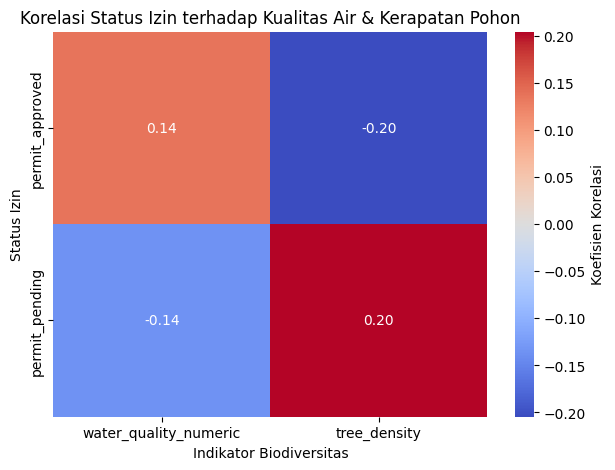

In [ ]:
# Buat kolom dummy untuk masing-masing permit status
df['permit_pending'] = df['permit_status_numeric'].apply(lambda x: 1 if x == 0 else 0)
df['permit_approved'] = df['permit_status_numeric'].apply(lambda x: 1 if x == 1 else 0)

# Ambil kolom yang diperlukan
x_col = ['water_quality_numeric', 'tree_density']
y_cols = ['permit_approved', 'permit_pending']

# Hitung korelasi
correlations = {y: df[x_col].corrwith(df[y]) for y in y_cols}

# Ubah ke DataFrame
corr_df = pd.DataFrame(correlations).T

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label':'Koefisien Korelasi'})
plt.title('Korelasi Status Izin terhadap Kualitas Air & Kerapatan Pohon')
plt.xlabel('Indikator Biodiversitas')
plt.ylabel('Status Izin')
plt.show()

<font size="3">Analisis menunjukkan adanya potensi pertukaran (trade-off) lingkungan dalam proses perizinan. Ketika izin disetujui, kualitas air cenderung membaik namun kerapatan pohon menurun. Sebaliknya, saat izin tertunda, kerapatan pohon meningkat meskipun kualitas air menurun. Pola ini mengisyaratkan bahwa kebijakan mungkin terfokus pada perbaikan satu aspek (misalnya air) dan tanpa disadari mengabaikan aspek lain (misalnya pohon). Meskipun demikian, karena semua korelasi ini sangat lemah, status izin kemungkinan bukanlah faktor utama penyebab perubahan tersebut. Faktor-faktor lain seperti kondisi lingkungan awal, jenis proyek, atau iklim, diperkirakan memiliki pengaruh yang jauh lebih besar.</font>

##### **Soal 2**

In [59]:
df = pd.read_csv('hasil soal 2.csv')
df.head()

,land_type_numeric,species_count
0,0,15
1,2,18
2,0,12
3,1,20
4,0,14


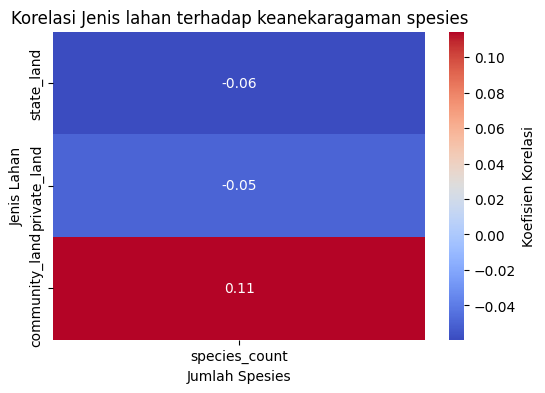

In [62]:
# Buat kolom dummy untuk masing-masing land type
df['state_land'] = df['land_type_numeric'].apply(lambda x: 1 if x == 0 else 0)
df['private_land'] = df['land_type_numeric'].apply(lambda x: 1 if x == 1 else 0)
df['community_land'] = df['land_type_numeric'].apply(lambda x: 1 if x == 2 else 0)

# Ambil kolom yang diperlukan
x_col = 'species_count'
y_cols = ['state_land', 'private_land', 'community_land']

# Hitung korelasi secara manual untuk tiap Y terhadap X
correlations = {y: df[x_col].corr(df[y]) for y in y_cols}

# Ubah jadi DataFrame supaya bisa pakai heatmap
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=[x_col])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label':'Koefisien Korelasi'})
plt.title('Korelasi Jenis lahan terhadap keanekaragaman spesies')
plt.xlabel('Jumlah Spesies')
plt.ylabel('Jenis Lahan')
plt.show()

<font size="3">Berdasarkan analisis, lahan yang dikelola oleh masyarakat menunjukkan korelasi positif dengan keanekaragaman spesies. Hal ini mengindikasikan bahwa model pengelolaan berbasis komunitas mungkin lebih efektif dalam menjaga ekosistem. Kemungkinan besar, ini terjadi berkat pengetahuan lokal yang mendalam, praktik berkelanjutan, dan insentif langsung bagi masyarakat untuk menjaga lingkungan demi keberlangsungan hidup mereka.

Di sisi lain, lahan yang dikelola oleh negara dan swasta menunjukkan korelasi negatif, yang bisa jadi berhubungan dengan praktik pemanfaatan sumber daya yang lebih intensif (seperti monokultur) dan terfokus pada kepentingan komersial, misalnya pertambangan atau perhutanan komersial. Hal ini berpotensi mengurangi keragaman spesies.</font>

##### **Soal 3**

In [56]:
df = pd.read_csv('hasil soal 3.csv')
df.head()

,conservation_id,defined_legal_boundary,species_count,tree_density,water_quality_score
0,C001,1,15,200,2
1,C002,0,18,250,1
2,C003,0,12,180,0
3,C004,1,20,220,2
4,C005,1,14,190,1


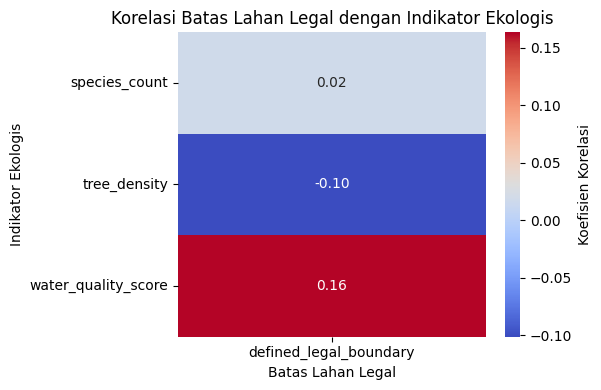

In [58]:
# Ambil kolom yang diperlukan
x_col = 'defined_legal_boundary'
y_cols = ['species_count', 'tree_density', 'water_quality_score']

# Hitung korelasi secara manual
correlations = {y: df[x_col].corr(df[y]) for y in y_cols}

# Buat DataFrame
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['defined_legal_boundary'])

# Visualisasi heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Koefisien Korelasi'})
plt.title('Korelasi Batas Lahan Legal dengan Indikator Ekologis')
plt.xlabel('Batas Lahan Legal')
plt.ylabel('Indikator Ekologis')
plt.tight_layout()
plt.show()

<font size="3">Hasil ini menunjukkan bahwa penetapan batas lahan secara hukum menghasilkan kondisi yang tidak seimbang. Kualitas air bisa membaik, namun di sisi lain, kerapatan pohon menurun. Ini mengisyaratkan bahwa penetapan batas lahan saja tidak cukup untuk melindungi semua aspek lingkungan.

Sama seperti membuat pagar di sekeliling kebun, pagar itu (batas legal) tidak akan membuat tanaman tumbuh subur. Butuh tindakan nyata seperti menyiram, memberi pupuk, dan merawatnya. Demikian juga, untuk melindungi pohon dan spesies, perlu ada upaya nyata di dalam batas lahan tersebut, bukan hanya mengandalkan penetapan batasnya saja.

Faktor-faktor ini menjadi sangat penting karena semua nilai korelasi dalam grafik ini sangat lemah, yang menandakan bahwa batas lahan legal bukanlah faktor utama yang menentukan hasil ekologis.</font>

##### **Konsep Kerja Script**

<font size="3"> **1. Persiapan Data**<br>
Skrip ini menggunakan pustaka Pandas untuk membaca data dari file CSV yang sudah bersih dan siap pakai. Karena data kategorikal (misalnya 'Permit Status', 'Water Quality', 'Land Type') sudah dikonversi menjadi angka (menjadi permit_status_numeric, land_type_numeric, water_quality_numeric) di PgAdmin, skrip dapat langsung melanjutkan ke tahap analisis.</font>

<font size="3"> **2. Proses Analisis Korelasi**<br>
Setelah data siap, skrip akan menghitung koefisien korelasi untuk setiap pasangan variabel. Ini berlaku untuk semua pertanyaan/analisis, baik itu tentang status izin, jenis lahan, atau batas lahan. Contohnya, skrip menghitung seberapa erat hubungan antara status izin (permit_approved dan permit_pending) terhadap kualitas air (water_quality_numeric). Koefisien korelasi ini adalah angka yang menunjukkan kekuatan dan arah hubungan antar variabel.</font>

<font size="3"> **3. Visualisasi Hasil**<br>
Hasil dari perhitungan korelasi kemudian divisualisasikan menjadi heatmap menggunakan pustaka Seaborn dan Matplotlib. Setiap heatmap dibuat terpisah untuk tiga pertanyaan dan satu visualisasi secara menyeluruh. Grafik ini menyajikan koefisien korelasi dalam bentuk warna dan angka, sehingga memudahkan kita untuk melihat pola dan wawasan dari data secara visual.</font>